### Load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

## Preprocessing

#### Load dataset

In [3]:
data = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 한글 다운로드

In [5]:
import matplotlib
import platform

# 맥북
if platform.system() == "Darwin":  
    matplotlib.rc('font', family='AppleGothic')

# 윈도우
elif platform.system() == "Windows":
    matplotlib.rc('font', family='Malgun Gothic')

# 리눅스 (colab 포함)
else:
    matplotlib.rc('font', family='NanumGothic')

# 마이너스 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

## 01

  OverTime  AttritionFlag
0       No       0.104364
1      Yes       0.305288


/var/folders/_2/38_0hjf147923fm1mt565b6w0000gn/T/ipykernel_51643/1973191743.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overtime_rate, x='OverTime', y='AttritionFlag', palette="Set2")


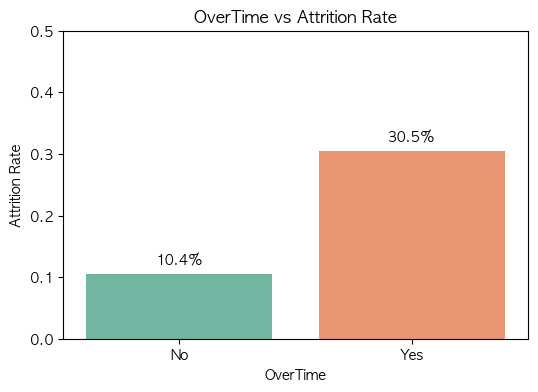

In [6]:
# 데이터 불러오기
df = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Attrition을 숫자로 바꿔주기 (Yes=1, No=0)
df['AttritionFlag'] = (df['Attrition'] == 'Yes').astype(int)

# OverTime별 평균 Attrition(=이탈률) 계산
overtime_rate = df.groupby('OverTime')['AttritionFlag'].mean().reset_index()

print(overtime_rate)

# 막대그래프 그리기
plt.figure(figsize=(6,4))
sns.barplot(data=overtime_rate, x='OverTime', y='AttritionFlag', palette="Set2")

# 퍼센트 표시
for i, v in enumerate(overtime_rate['AttritionFlag']):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center', va='bottom')

plt.title("OverTime vs Attrition Rate")
plt.ylabel("Attrition Rate")
plt.xlabel("OverTime")
plt.ylim(0, 0.5)  # 이탈률이 보통 0~50% 사이
plt.show()

# 02

  IncomeQuantile  AttritionFlag
0      Q1(하위20%)       0.312925
1             Q2       0.170068
2             Q3       0.105442
3             Q4       0.125850
4      Q5(상위20%)       0.091837


/var/folders/_2/38_0hjf147923fm1mt565b6w0000gn/T/ipykernel_51643/3809515815.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_rate = df.groupby('IncomeQuantile')['AttritionFlag'].mean().reset_index()
/var/folders/_2/38_0hjf147923fm1mt565b6w0000gn/T/ipykernel_51643/3809515815.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_rate, x='IncomeQuantile', y='AttritionFlag', palette="Blues")


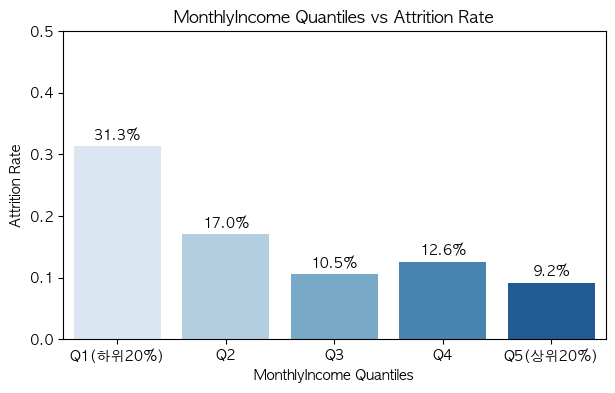

In [8]:

# 분위수 구간 나누기 (5분위: 20% 단위)
labels = ['Q1(하위20%)','Q2','Q3','Q4','Q5(상위20%)']
df['IncomeQuantile'] = pd.qcut(df['MonthlyIncome'], q=5, labels=labels)

# 각 분위수별 Attrition Rate 계산
income_rate = df.groupby('IncomeQuantile')['AttritionFlag'].mean().reset_index()

print(income_rate)

# 막대그래프 그리기
plt.figure(figsize=(7,4))
sns.barplot(data=income_rate, x='IncomeQuantile', y='AttritionFlag', palette="Blues")

# 퍼센트 표시
for i, v in enumerate(income_rate['AttritionFlag']):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center', va='bottom')

plt.title("MonthlyIncome Quantiles vs Attrition Rate")
plt.ylabel("Attrition Rate")
plt.xlabel("MonthlyIncome Quantiles")
plt.ylim(0, 0.5)  # 이탈률 보통 0~50% 범위
plt.show()


# 03

  DistanceGroup  AttritionFlag
0         0-5km       0.137658
1        6-10km       0.144670
2       11-15km       0.217391
3       16-20km       0.184000
4       21-30km       0.220588


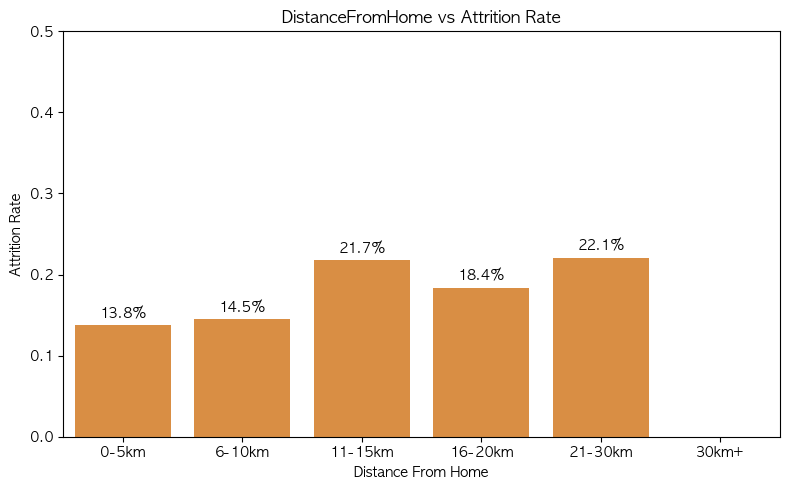

In [9]:
# AttritionFlag 컬럼 생성 (Yes=1, No=0)
df['AttritionFlag'] = (df['Attrition'] == 'Yes').astype(int)

# 거리 구간 정의 (마지막은 무한대 처리)
bins = [0, 5, 10, 15, 20, 30, np.inf]
labels = ['0-5km','6-10km','11-15km','16-20km','21-30km','30km+']

df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], 
                             bins=bins, 
                             labels=labels, 
                             include_lowest=True, 
                             right=True)

# 구간별 이탈률 계산
dist_rate = df.groupby('DistanceGroup', observed=True)['AttritionFlag'].mean().reset_index()
print(dist_rate)

# 막대그래프 그리기
plt.figure(figsize=(8,5))
sns.barplot(data=dist_rate, x='DistanceGroup', y='AttritionFlag', color='#F28E2B')

# 퍼센트 값 표시
for i, v in enumerate(dist_rate['AttritionFlag']):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center', va='bottom')

plt.title("DistanceFromHome vs Attrition Rate")
plt.ylabel("Attrition Rate")
plt.xlabel("Distance From Home")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

# 04

  YearsAtCompanyGroup  AttritionFlag
0                <=1년       0.348837
1                1~3년       0.184314
2                3~5년       0.130719
3               5~10년       0.122768
4              10~20년       0.066667
5                20년+       0.121212


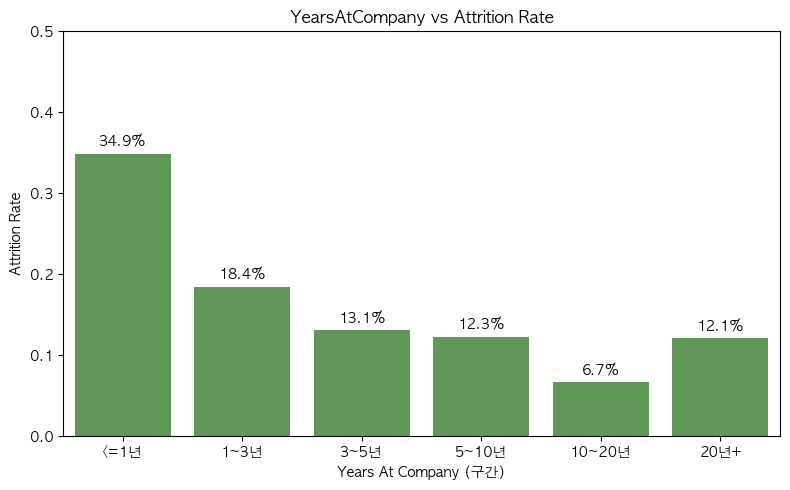

In [10]:
# 근속연수 구간 정의
bins = [-0.1, 1, 3, 5, 10, 20, np.inf]
labels = ['<=1년','1~3년','3~5년','5~10년','10~20년','20년+']

df['YearsAtCompanyGroup'] = pd.cut(df['YearsAtCompany'],
                                   bins=bins,
                                   labels=labels,
                                   include_lowest=True,
                                   right=True)

# 구간별 이탈률 계산
yac_rate = df.groupby('YearsAtCompanyGroup', observed=True)['AttritionFlag'].mean().reset_index()
print(yac_rate)

# 막대그래프 그리기
plt.figure(figsize=(8,5))
sns.barplot(data=yac_rate, x='YearsAtCompanyGroup', y='AttritionFlag', color='#59A14F')

# 퍼센트 값 표시
for i, v in enumerate(yac_rate['AttritionFlag']):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center', va='bottom')

plt.title("YearsAtCompany vs Attrition Rate")
plt.xlabel("Years At Company (구간)")
plt.ylabel("Attrition Rate")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

# 05

      BusinessTravel  AttritionFlag
0         Non-Travel       0.080000
1  Travel_Frequently       0.249097
2      Travel_Rarely       0.149569


/var/folders/_2/38_0hjf147923fm1mt565b6w0000gn/T/ipykernel_51643/3767992561.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bt_rate, x='BusinessTravel', y='AttritionFlag', palette="Purples")


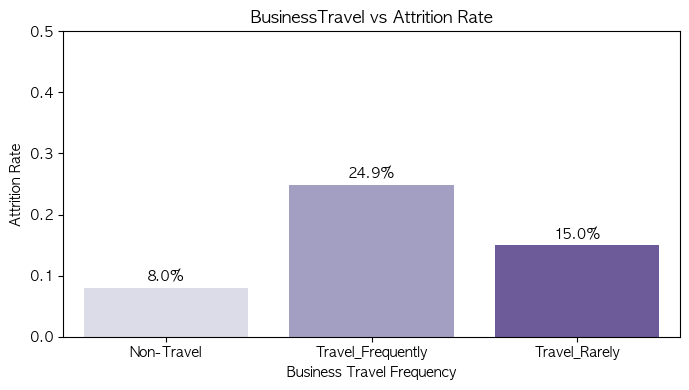

In [11]:
# 출장 빈도별 이탈률 계산
bt_rate = df.groupby('BusinessTravel')['AttritionFlag'].mean().reset_index()
print(bt_rate)

# 막대그래프 그리기
plt.figure(figsize=(7,4))
sns.barplot(data=bt_rate, x='BusinessTravel', y='AttritionFlag', palette="Purples")

# 퍼센트 표시
for i, v in enumerate(bt_rate['AttritionFlag']):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center', va='bottom')

plt.title("BusinessTravel vs Attrition Rate")
plt.xlabel("Business Travel Frequency")
plt.ylabel("Attrition Rate")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

# 06

   JobSatisfaction  AttritionFlag
0                1       0.228374
1                2       0.164286
2                3       0.165158
3                4       0.113290


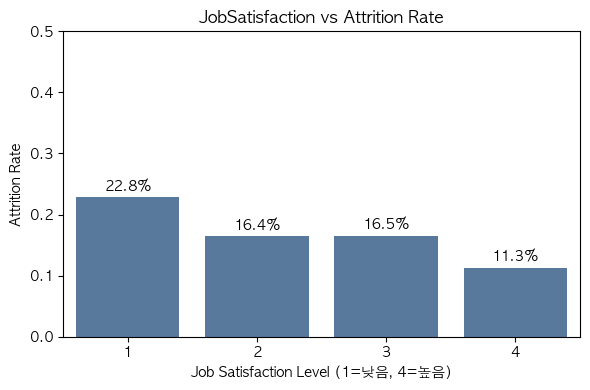

   EnvironmentSatisfaction  AttritionFlag
0                        1       0.253521
1                        2       0.149826
2                        3       0.136865
3                        4       0.134529


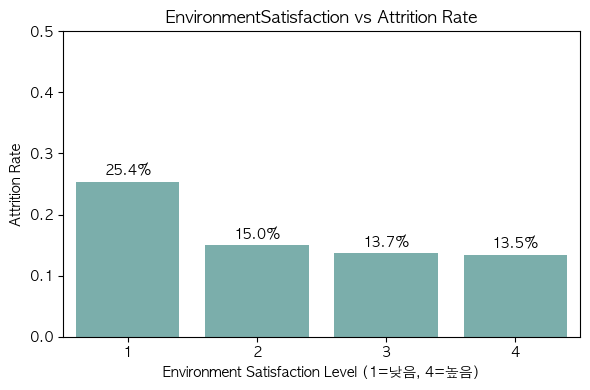

In [12]:
# -----------------------------
# JobSatisfaction vs Attrition
# -----------------------------
job_rate = df.groupby('JobSatisfaction')['AttritionFlag'].mean().reset_index()
print(job_rate)

plt.figure(figsize=(6,4))
sns.barplot(data=job_rate, x='JobSatisfaction', y='AttritionFlag', color="#4C78A8")
for i, v in enumerate(job_rate['AttritionFlag']):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center', va='bottom')
plt.title("JobSatisfaction vs Attrition Rate")
plt.xlabel("Job Satisfaction Level (1=낮음, 4=높음)")
plt.ylabel("Attrition Rate")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

# -----------------------------------
# EnvironmentSatisfaction vs Attrition
# -----------------------------------
env_rate = df.groupby('EnvironmentSatisfaction')['AttritionFlag'].mean().reset_index()
print(env_rate)

plt.figure(figsize=(6,4))
sns.barplot(data=env_rate, x='EnvironmentSatisfaction', y='AttritionFlag', color="#72B7B2")
for i, v in enumerate(env_rate['AttritionFlag']):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center', va='bottom')
plt.title("EnvironmentSatisfaction vs Attrition Rate")
plt.xlabel("Environment Satisfaction Level (1=낮음, 4=높음)")
plt.ylabel("Attrition Rate")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()